In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

/media/olle/DATA/Projects/orderbookrl


In [2]:
from orderbookrl.evaluate.collect_data import load_env_agent, run_through_all_data
import pandas as pd
%matplotlib inline

In [3]:
agent_id = 'PPO'
path = 'logs/tests/1/'
checkpoint = 396
data_dir = '/media/olle/DATA/Projects/orderbookrl/data/test/'
env, agent = load_env_agent(agent_id, path, checkpoint, data_path=data_dir)
result, trades, states, actions, rewards, quotes = run_through_all_data(env, agent)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:27648 to respond...


Using custom preprocessor mv


Waiting for redis server at 127.0.0.1:50690 to respond...
Starting local scheduler with the following resources: {'CPU': 8, 'GPU': 1}.

View the web UI at http://localhost:8889/notebooks/ray_ui97145.ipynb?token=1e5eb41d63e470ee3a972f29afec061ab76ec7dd6cc0f8ac



Created LogSyncer for /home/olle/ray_results/2018-08-31_09-01-108y929sya -> None
Using custom preprocessor mv
/media/olle/DATA/Projects/orderbookrl//data/feather/ /media/olle/DATA/Projects/orderbookrl//data/snap_json/


/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



/media/olle/DATA/Projects/orderbookrl/data/test/feather/ /media/olle/DATA/Projects/orderbookrl/data/test/snap_json/


/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



2018-04-04T19:59:24.660000Z
2018-04-05T01:40:24.966000Z
2018-04-05T06:02:23.022000Z
2018-04-05T11:26:06.560000Z
2018-04-05T14:58:16.397000Z
2018-04-05T17:53:55.962000Z
2018-04-05T22:10:53.933000Z
2018-04-06T05:07:19.949000Z
2018-04-06T12:28:07.356000Z
2018-04-06T20:09:07.944000Z
2018-04-07T06:58:24.929000Z
2018-04-07T19:47:20.682000Z
2018-04-08T11:59:27.051000Z
2018-04-09T03:10:06.173000Z
2018-04-09T11:11:16.093000Z
2018-04-09T12:59:41.794000Z
2018-04-09T21:33:03.033000Z
2018-04-10T06:08:14.784000Z
2018-04-10T15:34:33.669000Z
2018-04-11T10:49:37.474000Z
2018-04-12T06:10:03.758000Z
2018-04-12T11:41:55.851000Z
2018-04-12T13:14:34.660000Z
2018-04-12T20:13:54.170000Z
2018-04-13T01:29:58.397000Z
2018-04-13T07:47:44.279000Z
2018-04-13T13:06:26.931000Z
2018-04-13T20:31:04.366000Z
2018-04-14T02:13:52.001000Z
2018-04-14T10:41:59.606000Z
2018-04-14T19:15:58.957000Z
2018-04-15T03:53:35.659000Z
2018-04-15T15:19:26.913000Z
2018-04-16T02:10:37.051000Z
2018-04-16T09:28:26.154000Z
2018-04-16T17:31:32.

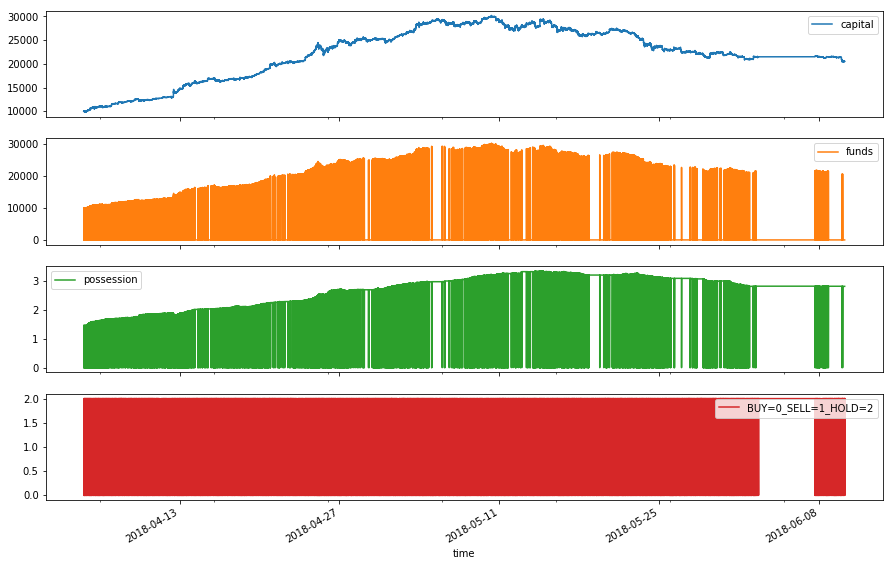

In [4]:
actions.columns = ['BUY=0_SELL=1_HOLD=2']
result.join(actions).plot(subplots=True, figsize=(15,10));

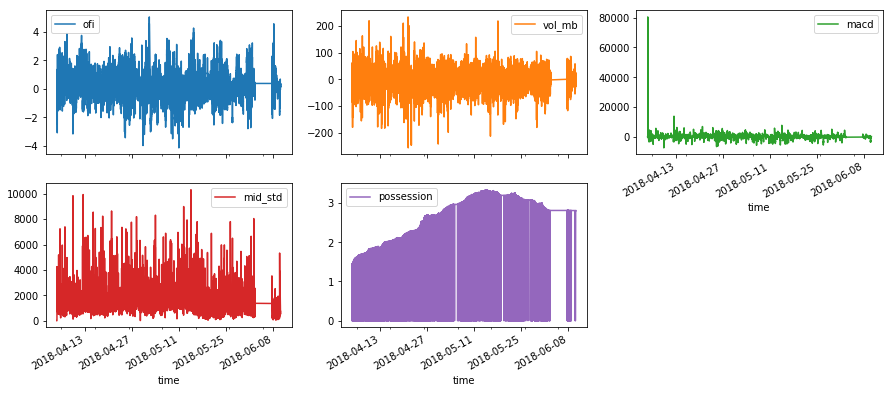

In [5]:
n_cols = 3
layout = (n_cols, 1+ int( (1+states.shape[1])/n_cols))
states.columns = ['ofi', 'vol_mb', 'macd', 'mid_std', 'possession']
states.plot(subplots=True, figsize=(15,10), layout=layout);

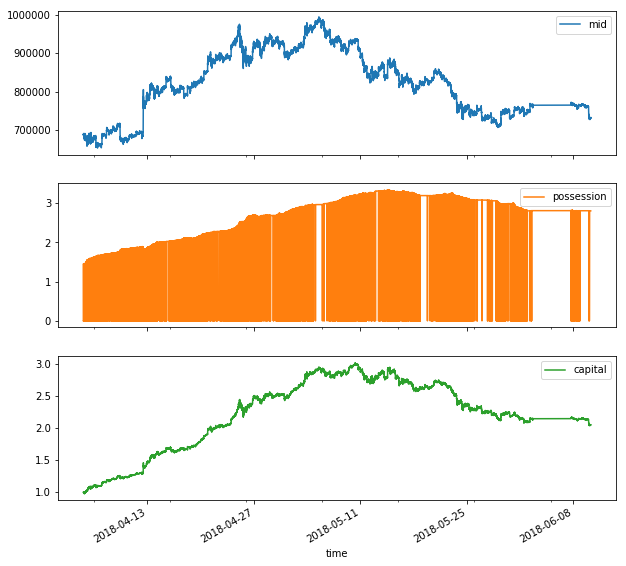

In [6]:
mid = (quotes['ask'] + quotes['bid'])/2
mid.name = 'mid'
temp = mid.to_frame().join(result.possession)
temp = temp.join(result.capital/result.capital[0])
temp.plot(subplots=True, figsize=(10,10));

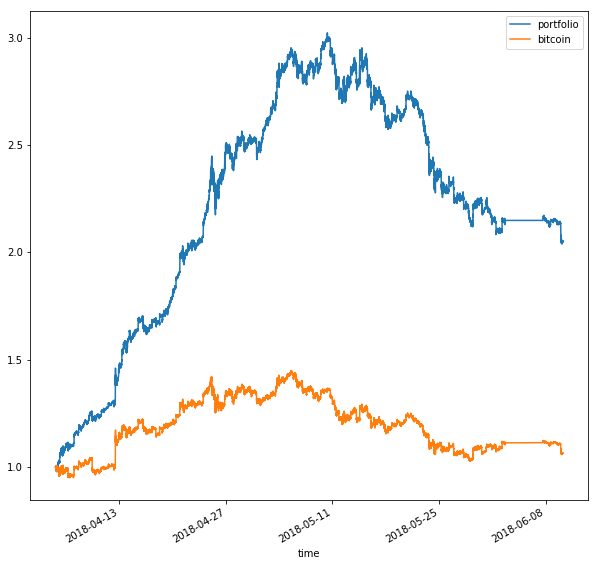

In [7]:
port_returns = result.capital.pct_change().iloc[1:]
port_cum_ret = (1+ port_returns).cumprod()
port_cum_ret.name = 'portfolio'
cum_returns = (1 + mid.pct_change().iloc[1:]).cumprod()
cum_returns.name = 'bitcoin'
temp = pd.concat([port_cum_ret, cum_returns], axis=1)
temp.plot(figsize=(10,10));

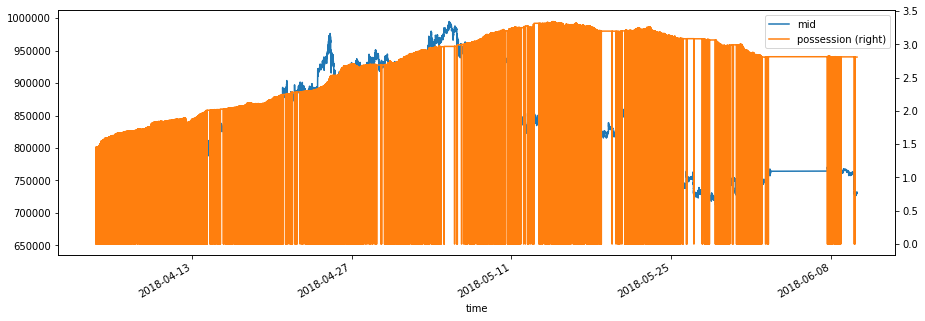

In [8]:
temp = mid.to_frame().join(result.possession)
temp.plot(secondary_y='possession', figsize=(15, 5));

In [9]:
port_returns.rolling(100).mean().nlargest(n=25)

time
2018-05-13 09:27:58.903    0.000243
2018-05-13 09:27:58.903    0.000243
2018-05-13 09:27:58.903    0.000243
2018-05-13 09:27:58.921    0.000243
2018-05-13 09:27:59.395    0.000242
2018-05-13 09:27:59.866    0.000242
2018-05-13 09:28:00.058    0.000242
2018-05-13 09:28:00.148    0.000242
2018-05-13 09:28:00.664    0.000241
2018-05-13 09:28:00.861    0.000241
2018-05-13 09:28:00.871    0.000240
2018-05-13 09:28:00.897    0.000240
2018-05-13 09:28:01.366    0.000239
2018-05-13 09:28:01.391    0.000231
2018-05-13 09:27:58.902    0.000210
2018-05-13 09:27:58.903    0.000209
2018-05-13 09:27:58.903    0.000207
2018-05-13 09:27:58.903    0.000207
2018-06-02 06:55:25.398    0.000188
2018-06-02 06:55:25.431    0.000188
2018-06-02 06:55:25.693    0.000187
2018-06-02 06:55:24.769    0.000187
2018-06-02 06:55:25.559    0.000186
2018-06-02 06:55:25.708    0.000186
2018-06-02 06:55:25.621    0.000185
Name: capital, dtype: float64

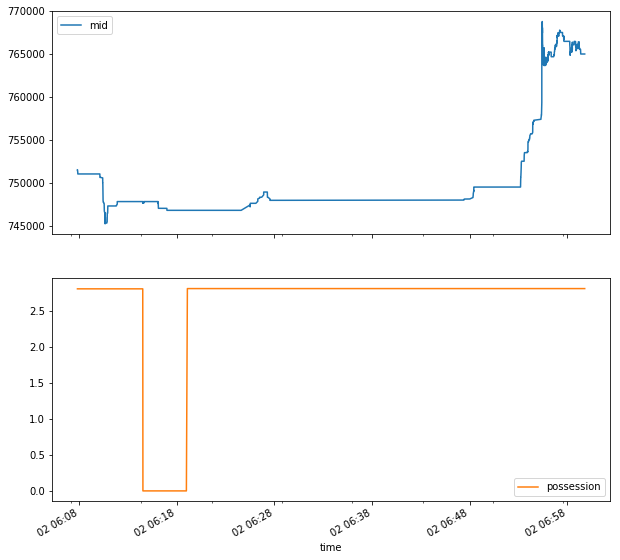

In [10]:
temp['2018-06-02 06'].plot(subplots=True, figsize=(10,10));

In [11]:
actions.head()

,BUY=0_SELL=1_HOLD=2
time,
2018-04-04 14:38:50.644,1
2018-04-04 14:38:54.342,2
2018-04-04 14:38:54.451,0
2018-04-04 14:38:54.612,0
2018-04-04 14:39:05.169,0


In [12]:
states.head()

,ofi,vol_mb,macd,mid_std,possession
time,,,,,
2018-04-04 14:38:50.644,0.000000,-14.616623,0.0,0.0,0.000000
2018-04-04 14:38:54.342,0.009987,-9.618123,0.0,0.0,0.000000
2018-04-04 14:38:54.451,0.038293,4.558920,0.0,0.0,0.000000
2018-04-04 14:38:54.612,0.048413,9.662346,0.0,0.0,1.457087
2018-04-04 14:39:05.169,0.041323,6.162346,0.0,0.0,1.457087


In [13]:
states.shape

(1861500, 5)

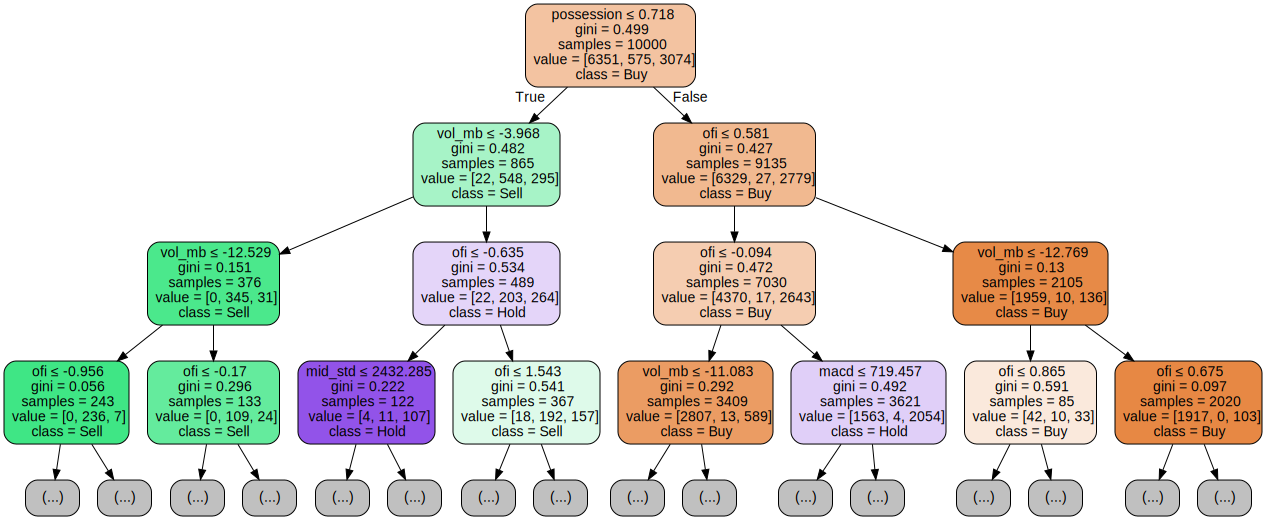

In [14]:
from sklearn import tree
import graphviz 
import numpy as np
np.random.seed(1)
n = 10000
idx = np.random.choice(np.arange(states.shape[0]), n)
reg = tree.DecisionTreeClassifier().fit(states.iloc[idx], actions.values[idx].ravel())
dot_data = tree.export_graphviz(reg, max_depth=3, out_file=None,
                         feature_names=states.columns, class_names=['Buy', 'Sell', 'Hold'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(dot_data)  